In [17]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("E:\\DSCT\\All data\\fake-news US Dataset\\train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [20]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

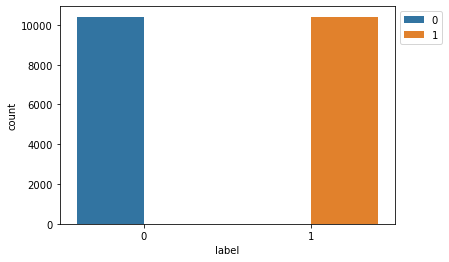

In [21]:
sns.countplot('label',hue='label', data=df)
plt.legend(bbox_to_anchor = (1,1))

In [22]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [23]:
df = df[['id','title','label']]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   label   20800 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 487.6+ KB


In [25]:
df = df.dropna()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20242 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 632.6+ KB


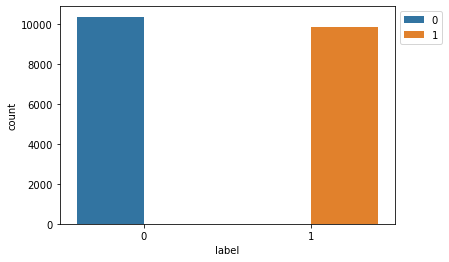

In [27]:
sns.countplot('label',hue='label', data=df)
plt.legend(bbox_to_anchor = (1,1))

In [28]:
df.head()

,id,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1


In [15]:
df[]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20242 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 632.6+ KB


# creating objects from classses


In [47]:
stemmer = PorterStemmer()
lemmitizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
df.reset_index(inplace = True)

# cleaning data using lemmetizer

In [48]:
corpus=[]
for i in range(len(df)):
    sent = re.sub('[^a-zA-Z]',' ',df['title'][i])
    sent =  sent.lower()
    sent=" ".join([lemmitizer.lemmatize(word) for word in str(sent).split()])
    sent = " ".join([word for word in str(sent).split() if(word not in stop_words)])
    corpus.append(sent)
    
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'life life luxury elton john favorite shark picture stare long transcontinental flight',
 'beno hamon win french socialist party presidential nomination new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll soc

# converting data into numbers using TFIDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X  = cv.fit_transform(corpus).toarray()

y=df['label']

In [50]:
temp_df = pd.DataFrame(X,columns=cv.get_feature_names())
temp_df.head()

,aaron,ab,abandon,abandoned,abbas,abc,abduction,abe,abedin,able,...,yr,zealand,zen,zero,zika,zionist,zone,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# train test split

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 3)

In [52]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (16193, 5000)
X_test: (4049, 5000)
y_train: (16193,)
y_test: (4049,)


# model evaluation

In [53]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def model_Eval(y_test,y_pred):
    
    #Step 1: Accuacy, Error, PS, RS, F1S:
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy of model is:",acc)
    print("Error in model is: ",1-acc)
    print("Precision score of model is: ",precision_score(y_test,y_pred,average='weighted'))
    print("Recall score of model is: ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 Score of model is: ",f1_score(y_test,y_pred,average='weighted'))
    print()

    #Step 2: Confusion Matrix:
    print("____Confusion Matric____")
    cm = confusion_matrix(y_test,y_pred)
    print(cm)

    #Step 3: Heatmap: 

    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    #Step 4: Classification report: 

    lab = ['setosa', 'versicolor','virginica']
    print(classification_report(y_test,y_pred,target_names = lab))

# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Final Model for k=3
 #Step 1: Creating Model
ML_Model = KNeighborsClassifier(n_neighbors=3,p=2)

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)

53.099530748332924


Accuracy of model is: 0.5309953074833292
Error in model is:  0.46900469251667076
Precision score of model is:  0.7214622452903278
Recall score of model is:  0.5309953074833292
F1 Score of model is:  0.4203803684516061

____Confusion Matric____
[[ 221 1880]
 [  19 1929]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

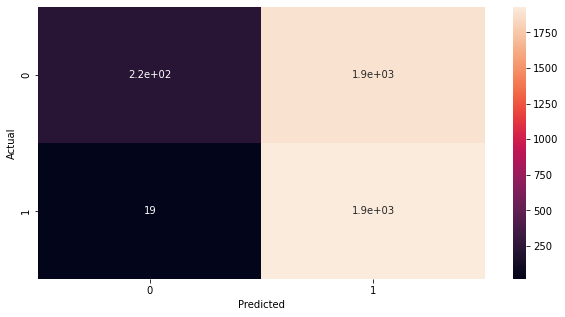

In [55]:
model_Eval(y_test,y_pred)

# GNB

In [56]:
from sklearn.naive_bayes import GaussianNB

ML_Model = GaussianNB()
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)

Model created
76.51271918992344


Accuracy of model is: 0.7651271918992344
Error in model is:  0.2348728081007656
Precision score of model is:  0.7654762024852008
Recall score of model is:  0.7651271918992344
F1 Score of model is:  0.765198614992999

____Confusion Matric____
[[1602  499]
 [ 452 1496]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

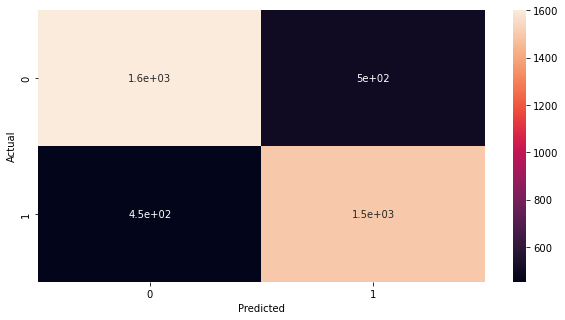

In [57]:
model_Eval(y_test,y_pred)

# SVM

Accuracy of model is: 0.9310940973079773
Error in model is:  0.06890590269202268
Precision score of model is:  0.9350243787739468
Recall score of model is:  0.9310940973079773
F1 Score of model is:  0.9310673726583233

____Confusion Matric____
[[1868  233]
 [  46 1902]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

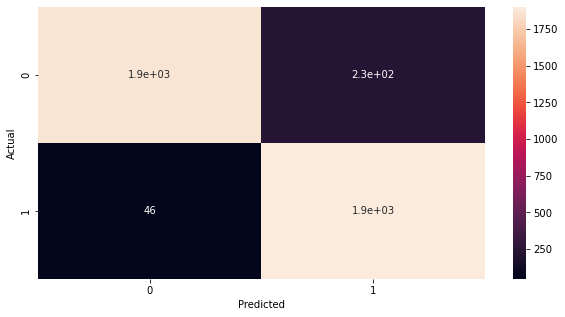

In [58]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

svm_Model = SVC(kernel='linear')
svm_Model.fit(X_train,y_train)
y_pred = svm_Model.predict(X_test)
# acc= svm_Model.score(y_pred,y_test)
# print(acc*100)
model_Eval(y_test,y_pred)

# Decision Tree

Model created
91.47937762410471
Accuracy of model is: 0.9147937762410472
Error in model is:  0.08520622375895281
Precision score of model is:  0.9149912429233407
Recall score of model is:  0.9147937762410472
F1 Score of model is:  0.9148161012725012

____Confusion Matric____
[[1910  191]
 [ 154 1794]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

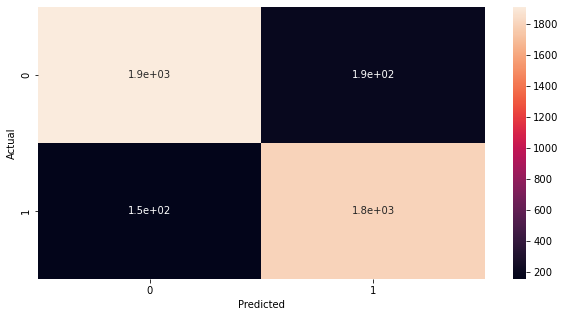

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ML_Model = DecisionTreeClassifier()
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# Adaboost

Model created
91.84983946653495
Accuracy of model is: 0.9184983946653494
Error in model is:  0.08150160533465056
Precision score of model is:  0.9243818696350256
Recall score of model is:  0.9184983946653494
F1 Score of model is:  0.9184072458467772

____Confusion Matric____
[[1820  281]
 [  49 1899]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

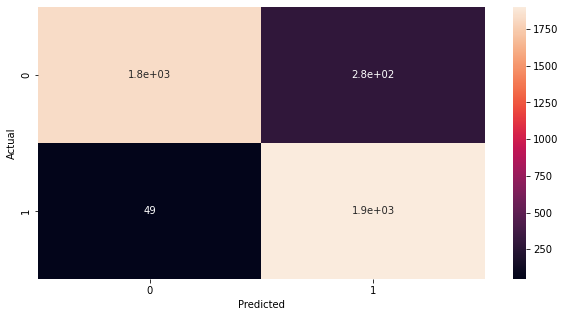

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ML_Model = AdaBoostClassifier(random_state=96)
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
add_model = LogisticRegression()
add_model.fit(X_train,y_train)
y_pred = add_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc*100)

91.94862929118301


Accuracy of model is: 0.91948629291183
Error in model is:  0.08051370708816996
Precision score of model is:  0.9260960421066555
Recall score of model is:  0.91948629291183
F1 Score of model is:  0.9193738786271048

____Confusion Matric____
[[1815  286]
 [  40 1908]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

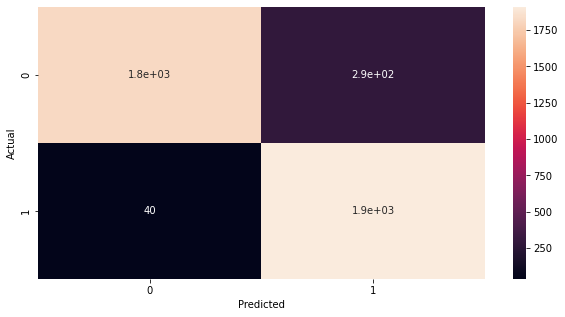

In [62]:
model_Eval(y_test,y_pred)

# RandomForest

Model created
89.30600148184737
Accuracy of model is: 0.8930600148184737
Error in model is:  0.10693998518152625
Precision score of model is:  0.8968747241157812
Recall score of model is:  0.8930600148184737
F1 Score of model is:  0.8930156291051403

____Confusion Matric____
[[1790  311]
 [ 122 1826]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

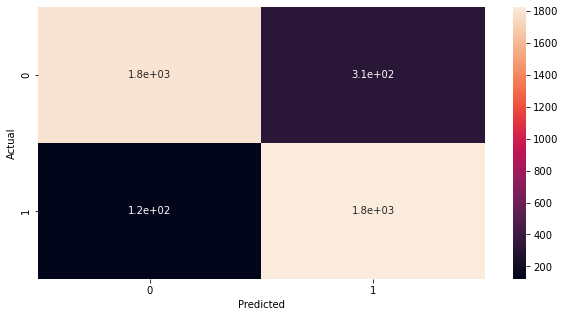

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ML_Model = RandomForestClassifier(max_depth=2)
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
Fish_Model = LinearRegression()
Fish_Model.fit(X_train,y_train)
y_pred = Fish_Model.predict(X_test)
acc = Fish_Model.score(X_test,y_test)
print(acc*100)

-3.400292581326603e+24


# save the model

In [65]:
import joblib
joblib.dump(cv,"CVFakeNewsClassifierLemm02.pkl")
joblib.dump(add_model,"FakeNewsClassifierLemm02.pkl")

['FakeNewsClassifierLemm02.pkl']